# Machine Problem No. 5: Object Detection and Recognition using YOLO

## Objective
To implement real-time object detection using the YOLO (You Only Look Once) model and gain hands-on experience in loading pre-trained models, processing images, and visualizing results.


## Task
1. **Model Loading**: Use TensorFlow to load a pre-trained YOLO model.
2. **Image Input**: Select an image that contains multiple objects.
3. **Object Detection**: Feed the selected image to the YOLO model to detect various objects within it.
4. **Visualization**: Display the detected objects using bounding boxes and class labels.
5. **Testing**: Test the model on at least three different images to compare its performance and observe its accuracy.
6. **Performance Analysis**: Document your observations on the model's speed and accuracy, and discuss how YOLO's single-pass detection impacts its real-time capabilities.

Processing place-1.jpg

image 1/1 /content/place-1.jpg: 448x640 2 cups, 1 couch, 146.5ms
Speed: 3.7ms preprocess, 146.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Detection time: 0.30 seconds
Number of objects detected: 3
Processing place-2.jpg

image 1/1 /content/place-2.jpg: 448x640 5 chairs, 3 dining tables, 1 vase, 147.5ms
Speed: 3.3ms preprocess, 147.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Detection time: 0.19 seconds
Number of objects detected: 9
Processing place-3.jpg

image 1/1 /content/place-3.jpg: 448x640 1 bowl, 4 chairs, 1 potted plant, 1 dining table, 1 book, 2 vases, 140.2ms
Speed: 3.3ms preprocess, 140.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
Detection time: 0.25 seconds
Number of objects detected: 10
Processing place-4.jpg

image 1/1 /content/place-4.jpg: 480x640 1 chair, 2 potted plants, 2 books, 1 vase, 179.0ms
Speed: 3.4ms preprocess, 179.0ms inference, 1.3ms postprocess per image at sha

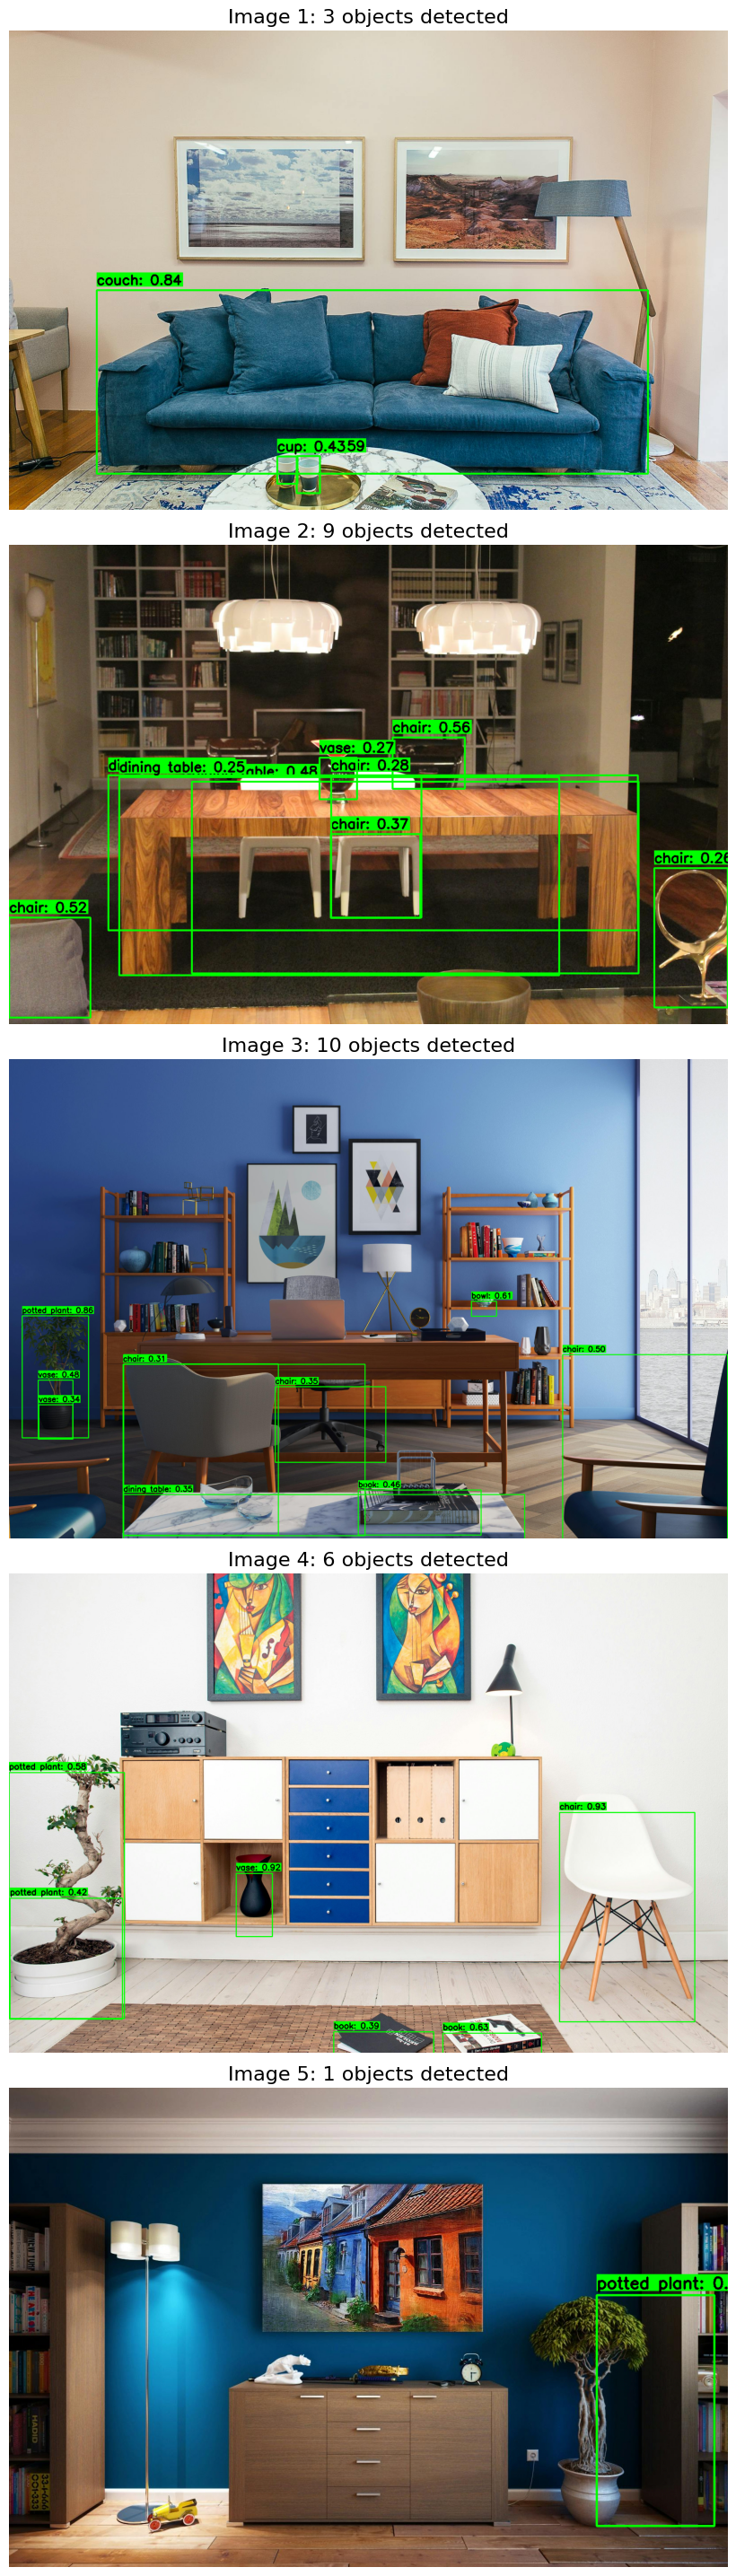

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from ultralytics import YOLO

# Load the pre-trained YOLO model
def load_model():
  return YOLO('yolov8n.pt')

# Crop image to 3:2 aspect ratio
def crop_to_3_2_ratio(img):
  h, w = img.shape[:2]
  target_ratio = 3 / 2
  current_ratio = w / h

  if current_ratio > target_ratio:
    # Image is too wide, crop width
    new_w = int(h * target_ratio)
    start = (w - new_w) // 2
    img = img[:, start:start + new_w]
  elif current_ratio < target_ratio:
    # Image is too tall, crop height
    new_h = int(w / target_ratio)
    start = (h - new_h) // 2
    img = img[start:start + new_h, :]

  return img

# Perform object detection
def detect_objects(model, image_path):
  results = model(image_path)
  return results[0]

# Visualize the results
def visualize_results(image_path, results):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = crop_to_3_2_ratio(img)

  for box in results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = float(box.conf)
    cls = int(box.cls)

    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
    label = f"{results.names[cls]}: {conf:.2f}"
    font_scale = 1.2
    font_thickness = 3
    (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)

    # Adjust the text box position to prevent overlap
    text_y_position = max(0, y1 - 10)
    cv2.rectangle(img, (x1, text_y_position - text_height - 10), (x1 + text_width, text_y_position), (0, 255, 0), -1)
    cv2.putText(img, label, (x1, text_y_position - 5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), font_thickness)

  return img

# Main function to run the object detection pipeline
def main():
  model = load_model()
  image_paths = ["place-1.jpg", "place-2.jpg", "place-3.jpg", "place-4.jpg", "place-5.jpg"]
  fig, axs = plt.subplots(len(image_paths), 1, figsize=(15, 30))

  for i, image_path in enumerate(image_paths):
    print(f"Processing {image_path}")
    start_time = time.time()
    results = detect_objects(model, image_path)
    end_time = time.time()

    print(f"Detection time: {end_time - start_time:.2f} seconds")
    print(f"Number of objects detected: {len(results.boxes)}")

    img_with_boxes = visualize_results(image_path, results)

    axs[i].imshow(img_with_boxes)
    axs[i].set_title(f"Image {i+1}: {len(results.boxes)} objects detected", fontsize=16)
    axs[i].axis('off')

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()

if __name__ == "__main__":
  main()

### Overview of the Task
The `YOLO (You Only Look Once)` algorithm, specifically variant `YOLOv8n.pt` from Ultralytics, is a landmark in object detection technology, intended mainly for high-speed performances with a commendable quality of accuracy provided. The model's architecture is designed to support fast processing, thus making it perfect for real-time applications in the different fields applied. In this task, five images (`place-1.jpg` to `place-5.jpg`) were taken which discuss the detection capabilities and the measurements of performance based on the model.



### Detection Performance and Object Recognition
The `YOLOv8` was generally effective in identifying a wide diversity of objects in the five images. For instance, `place-1.jpg` contains two cups and one couch; while it identified the couch with an accuracy of 0.84 that means good recognition of the object, which goes to show that the model correctly understood the features of the couch in the environment pertaining to the image. However, the cups obtained lower confidence scores, that is 0.43 and 0.59; thus the model indicates uncertainty in classifying these objects. These confidence level tend to qualify the model's potential weakness with regards to the identification of certain classes of objects which can tend to run into overlap with one another or some that are lacking in unique properties.

### Issues with Duplicate and Undetected Objects
Apart from the `YOLOv8` model strengths, there is a limitation related to the duplicate detection occurrence in its model. For example, in `place-3.jpg`, the model had found two vases as two independent objects that required detection. This implies that even if one vase contains features whose parts maybe featured as different objects, the model detects them as such. This might result from the increased sensitivity of the model to boundaries of the object and its features, sometimes causing the amplification of the number of objects detected. Besides this, other objects did not appear in some of the images. These include paintings and light sources. The failure of these detections does not only point to the fact that maybe the model picks up some classes more than others; it may be that those objects do not have enough discriminative features to depend on them for proper identification. This could be particularly problematic in scenarios where comprehensive detection is critical.

### Speed and Processing Efficiency
For the speed of the `YOLOv8` model, the processing time was very excellent showing the efficiency in the average preprocessing times over the five images taken. The average preprocessing took about 3.4 milliseconds while the inference times had an average range of around 142.1 milliseconds and postprocessing about 1.5 milliseconds. Consequently, total detection times appearing ranged from 0.16 seconds for `place-5.jpg` up to 0.30 seconds for `place-1.jpg`. These processing capabilities at a rapid pace make the model applicable in real-time environments, meaning it can be effectively used wherever speedy interactivity is needed and also where immediate feedback is desired. The ability to recognize objects is a robust advantage within dynamic scenes where speed counts and may involve traffic monitoring or real-time analysis of events.

### Impact of Single-Pass Detection Architecture
The architecture of YOLO, which enables single-pass detection, forms a great contribution to efficiency. Unlike the traditional object detection methods that make use of multiple stages of processing, YOLO works to process the entire image at once and, therefore, detection becomes easier and faster. The efficiency it brings streamlines not only speed but also diminishes more complications in the process of applying object detection in practical applications. Nevertheless, it must be said that this speed advantage is accompanied with trade-offs. For one, YOLOv8, being very fast comes at the expense of accuracy, there might be an issue with accuracy in case objects are small or overlap. The use of anchor boxes may further result in a higher rate of missing detection where shapes are not as expected, thus reducing the ability to use the model in some situations.

### Conclusion
Generally, the `YOLOv8 model` was able to demonstrate a good balance between speed and accuracy in executing object detection tasks as observed in the interpretation of the five images. The model could successfully detect numerous objects, with the capability of processing having impressive ability, though areas with significant room for improvement were found to include duplicate detection and identification of certain classes of objects. More increases in utility would be from the further improvement of the ability of the model to further minimize duplicate counts and improve its sensitivity in the detection of underrepresented objects. Generally speaking, results tend to indicate that `YOLOv8` can hold promise for real-time object detection, to the sureness with improvements made possible for complete recognition abilities in dynamic environments.

## Key Points
* YOLO performs detection in a single pass, making it highly efficient.
* Suitable for applications requiring real-time object detection.

In [17]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Machine Problem No. 5: Object Detection and Recognition using YOLO.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Machine Problem No. 5: Object Detection and Recognition using YOLO.ipynb to pdf
[NbConvertApp] Writing 37217 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 58643 bytes to /content/drive/MyDrive/Colab Notebooks/Machine Problem No. 5: Object Detection and Recognition using YOLO.pdf
